In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("all_season_batting_card.csv")

In [3]:
df2 = pd.read_csv("season_batting_card_2024.csv")

In [4]:
df = pd.concat([df2, df1])

In [5]:
df.head()

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link
0,2024.0,1422119,CSK v RCB,CSK,RCB,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,India,RCB,1,...,0.0,1.0,105,False,False,"{'wickets': 4, 'runs': 77}",11.2,c Ravindra b Mustafizur Rahman,tiki-taka catch between Rahane and Ravindra at...,NaN
1,2024.0,1422119,CSK v RCB,CSK,RCB,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,India,RCB,1,...,8.0,0.0,152.17,True,False,"{'wickets': 1, 'runs': 41}",4.3,c Ravindra b Mustafizur Rahman,The Fizz strikes in his first over this IPL. T...,NaN
2,2024.0,1422119,CSK v RCB,CSK,RCB,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,India,RCB,1,...,0.0,0.0,0,False,False,"{'wickets': 2, 'runs': 41}",4.6,c &dagger;Dhoni b Mustafizur Rahman,double strike for the Fizz. He has been done i...,NaN
3,2024.0,1422119,CSK v RCB,CSK,RCB,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,India,RCB,1,...,0.0,0.0,0,False,False,"{'wickets': 3, 'runs': 42}",5.3,c &dagger;Dhoni b Chahar,CSK have come roaring back. Maxwell is gone fo...,NaN
4,2024.0,1422119,CSK v RCB,CSK,RCB,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,India,RCB,1,...,1.0,0.0,81.81,False,False,"{'wickets': 5, 'runs': 78}",11.4,b Mustafizur Rahman,four for Fizz. Hits the top of leg. The cutter...,NaN


In [6]:
df.shape

(16648, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16648 entries, 0 to 15719
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           16612 non-null  float64
 1   match_id         16648 non-null  int64  
 2   match_name       16648 non-null  object 
 3   home_team        16648 non-null  object 
 4   away_team        16648 non-null  object 
 5   venue            16648 non-null  object 
 6   city             16648 non-null  object 
 7   country          16648 non-null  object 
 8   current_innings  16648 non-null  object 
 9   innings_id       16648 non-null  int64  
 10  name             16648 non-null  object 
 11  fullName         16648 non-null  object 
 12  runs             16642 non-null  float64
 13  ballsFaced       16642 non-null  float64
 14  minutes          16642 non-null  object 
 15  fours            16642 non-null  float64
 16  sixes            16642 non-null  float64
 17  strikeRate       

In [8]:
df.isnull().sum()

season                36
match_id               0
match_name             0
home_team              0
away_team              0
venue                  0
city                   0
country                0
current_innings        0
innings_id             0
name                   0
fullName               0
runs                   6
ballsFaced             6
minutes                6
fours                  6
sixes                  6
strikeRate             6
captain                0
isNotOut               6
runningScore           6
runningOver         3896
shortText              0
commentary          3899
link               16648
dtype: int64

In [9]:
df = df.dropna(subset=['season', 'runningOver', 'runs', 'ballsFaced', 'minutes', 'fours', 'sixes', 'strikeRate', 'isNotOut'])

In [10]:
grouped = df.groupby(['season', 'fullName'])['runs'].sum()

In [11]:
# coverting back to dataframe
Seasonrun = grouped.reset_index()

In [12]:
top_scorers = Seasonrun .loc[Seasonrun .groupby('season')['runs'].idxmax()]

In [13]:
# Season-wise top scorers
print(top_scorers)

      season          fullName   runs
39    2008.0    Gautam Gambhir  476.0
214   2009.0    Matthew Hayden  512.0
402   2010.0  Sachin Tendulkar  458.0
528   2011.0      Murali Vijay  434.0
651   2012.0    Gautam Gambhir  524.0
835   2013.0    Michael Hussey  496.0
992   2014.0     Robin Uthappa  577.0
1052  2015.0      David Warner  510.0
1256  2016.0       Virat Kohli  636.0
1294  2017.0      David Warner  426.0
1442  2018.0   Kane Williamson  584.0
1535  2019.0      David Warner  522.0
1683  2020.0          KL Rahul  477.0
1873  2021.0    Shikhar Dhawan  518.0
1951  2022.0       Jos Buttler  687.0
2188  2023.0      Shubman Gill  692.0
2341  2024.0      Sunil Narine  461.0


In [14]:
grouped_scorers = Seasonrun.groupby('fullName')['runs'].sum()

In [15]:
grouped_scorers_df = grouped_scorers.reset_index()


In [16]:
sorted_scorers = grouped_scorers_df.sort_values(by='runs', ascending=False)


In [17]:
overall_top_scorer = sorted_scorers.iloc[0]


In [18]:
# overall Top scorer 

print(overall_top_scorer)

fullName    Virat Kohli
runs             5782.0
Name: 602, dtype: object


# Bar plot for top run scorer by season

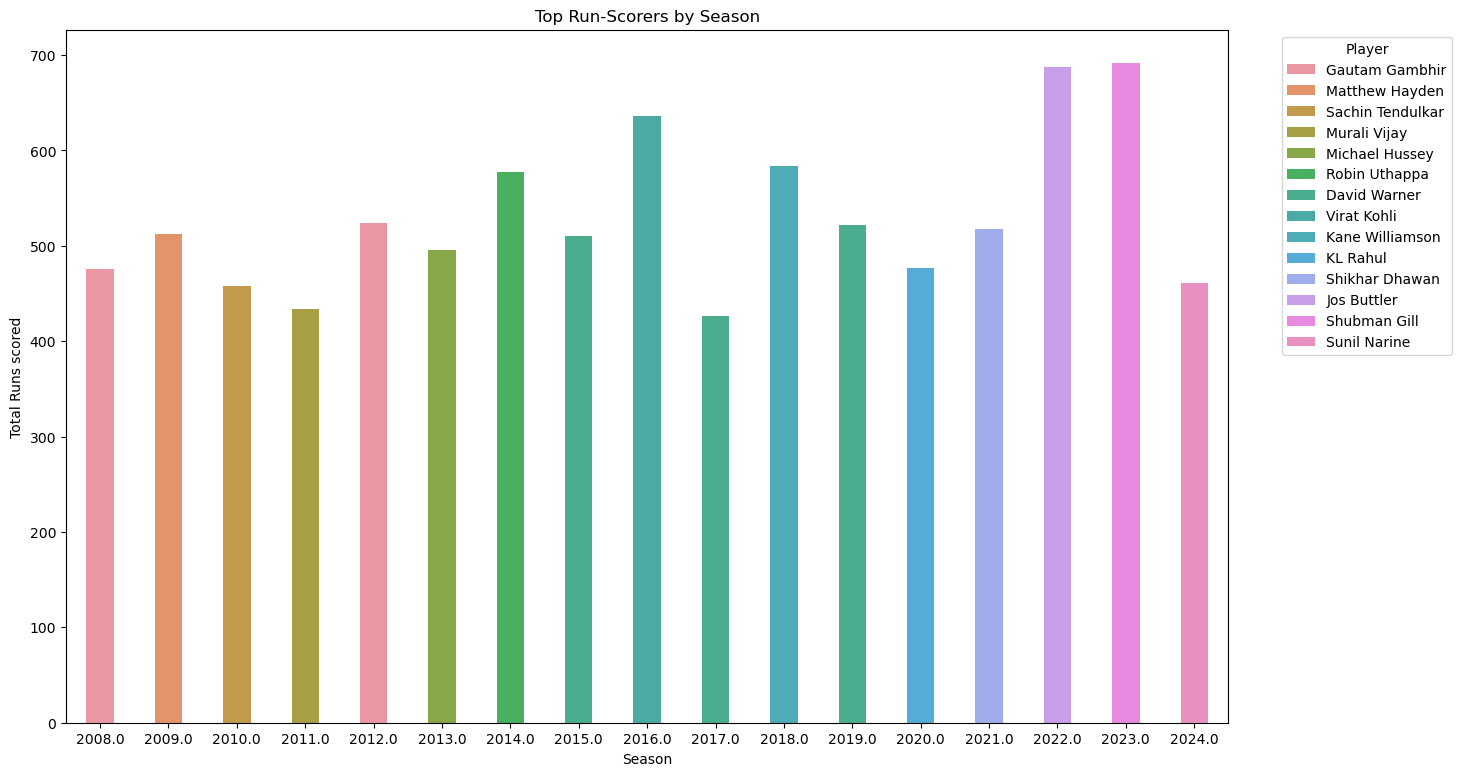

In [19]:
# graph for total runs scored
plt.figure(figsize=(15,9))
sns.barplot(data=top_scorers, x='season', y='runs', hue='fullName',width=0.4,dodge=False)
plt.title('Top Run-Scorers by Season')
plt.xlabel('Season')
plt.ylabel('Total Runs scored')
plt.legend(title='Player', bbox_to_anchor=(1.04, 1), loc='upper left')
plt.show()

## Cumulative runs scored

In [20]:
overall_player_runs = top_scorers.groupby('fullName')['runs'].sum().reset_index()


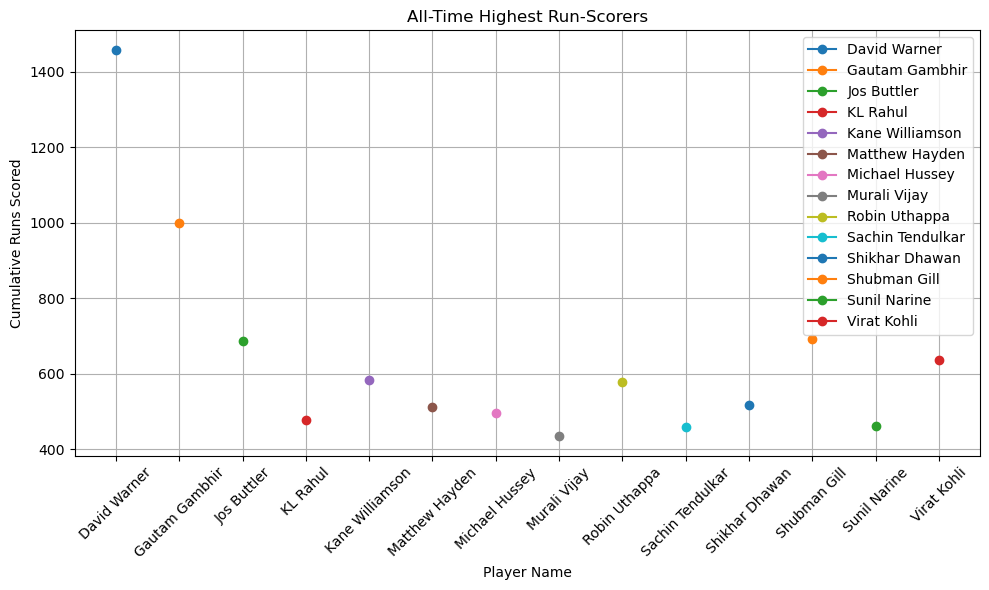

In [21]:

plt.figure(figsize=(10, 6))

for index, row in overall_player_runs.iterrows():
    plt.plot(row['fullName'], row['runs'], marker='o', label=row['fullName'])

plt.xlabel('Player Name')
plt.ylabel('Cumulative Runs Scored')
plt.title('All-Time Highest Run-Scorers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Strike Rate using scatterplot

In [22]:
df['strikeRate'] = pd.to_numeric(df['strikeRate'], errors='coerce')


In [23]:
df = df[df['strikeRate'] > 0]

In [24]:
grouped = df.groupby('season')['strikeRate'].apply(list).reset_index()


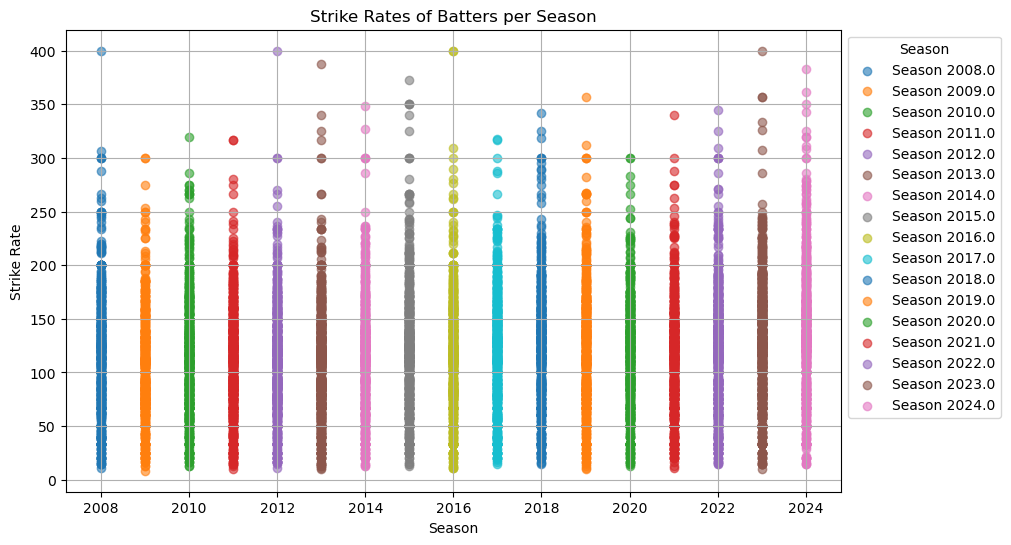

In [25]:
plt.figure(figsize=(10, 6))

for _, row in grouped.iterrows():
    season = row['season']
    strike_rates = row['strikeRate']
    plt.scatter([season]*len(strike_rates), strike_rates, label=f'Season {season}', alpha=0.6)

plt.title('Strike Rates of Batters per Season')
plt.xlabel('Season')
plt.ylabel('Strike Rate')
plt.legend(title='Season', bbox_to_anchor=(1,1), loc='upper left')
plt.grid(True)
plt.show()

# Heat Map to show run distribution

In [26]:
df['over'] = df['runningOver'].astype(int)

In [27]:
conditions = [
    (df['over'] <= 6),
    (df['over'] >= 7) & (df['over'] <= 15),
    (df['over'] >= 16)
]

In [28]:
choices = ['Powerplay', 'Middle', 'Death']

In [29]:
df['over_category'] = pd.Categorical(pd.cut(df['over'], bins=[0, 6, 15, 20], labels=choices, right=True))


In [30]:
heatmap_data = df.pivot_table(values='runs', index='match_id', columns='over_category', aggfunc='sum', fill_value=0)


C:\Users\A\AppData\Local\Temp\ipykernel_4908\3995915695.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(values='runs', index='match_id', columns='over_category', aggfunc='sum', fill_value=0)


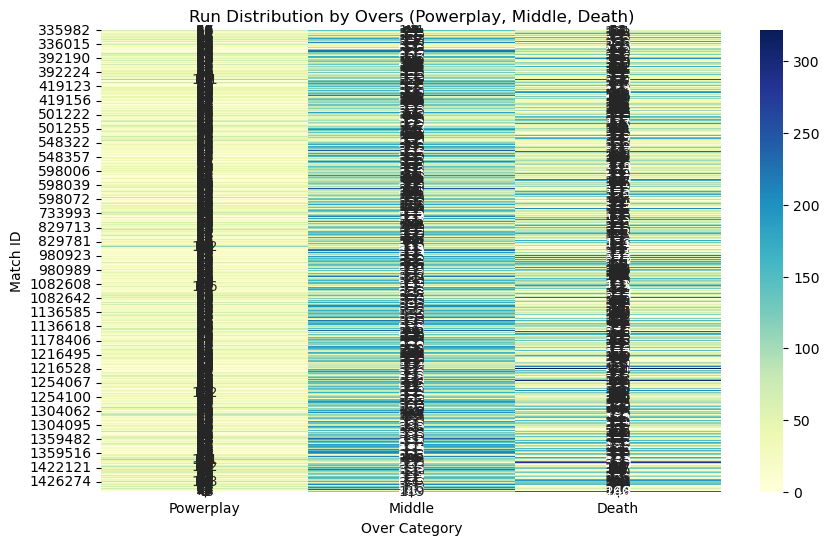

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Run Distribution by Overs (Powerplay, Middle, Death)')
plt.xlabel('Over Category')
plt.ylabel('Match ID')
plt.show()

# Analyzing fours and six hit by players

In [36]:
selected_df = df.groupby(['season', 'fullName'])[['fours', 'sixes']].sum().reset_index()

In [37]:
selected_df['boundaries'] = selected_df['fours'] + selected_df['sixes']


In [39]:
selected_df =selected_df.sort_values(by=['season', 'boundaries'], ascending=[True, False])


In [40]:
top_batsmen = selected_df.groupby('season').head(3)

In [41]:
top_batsmen

,season,fullName,fours,sixes,boundaries
35,2008.0,Gautam Gambhir,61.0,7.0,68.0
95,2008.0,Shaun Marsh,39.0,23.0,62.0
132,2008.0,Yusuf Pathan,38.0,22.0,60.0
139,2009.0,Adam Gilchrist,54.0,29.0,83.0
199,2009.0,Matthew Hayden,56.0,21.0,77.0
247,2009.0,Suresh Raina,37.0,21.0,58.0
376,2010.0,Sachin Tendulkar,66.0,1.0,67.0
402,2010.0,Virender Sehwag,47.0,14.0,61.0
387,2010.0,Sourav Ganguly,47.0,13.0,60.0
547,2011.0,Virender Sehwag,51.0,18.0,69.0


In [42]:
seasons = top_batsmen['season'].unique()

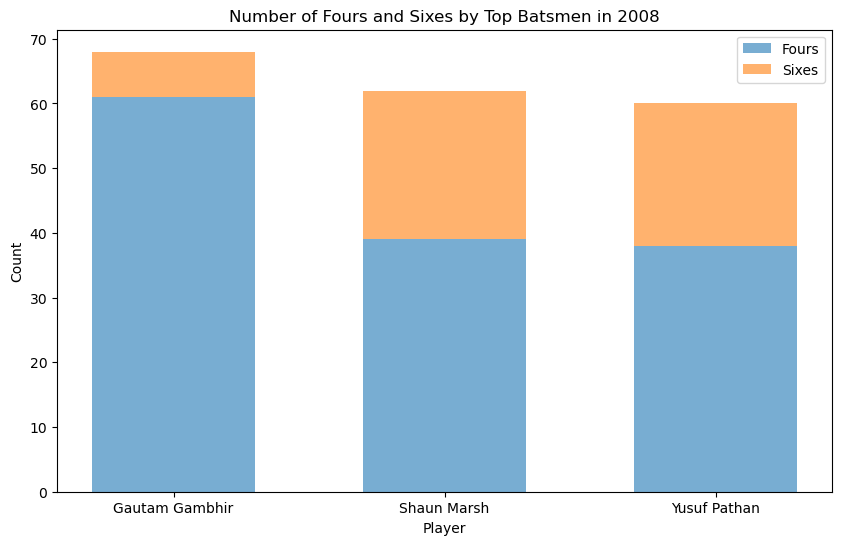

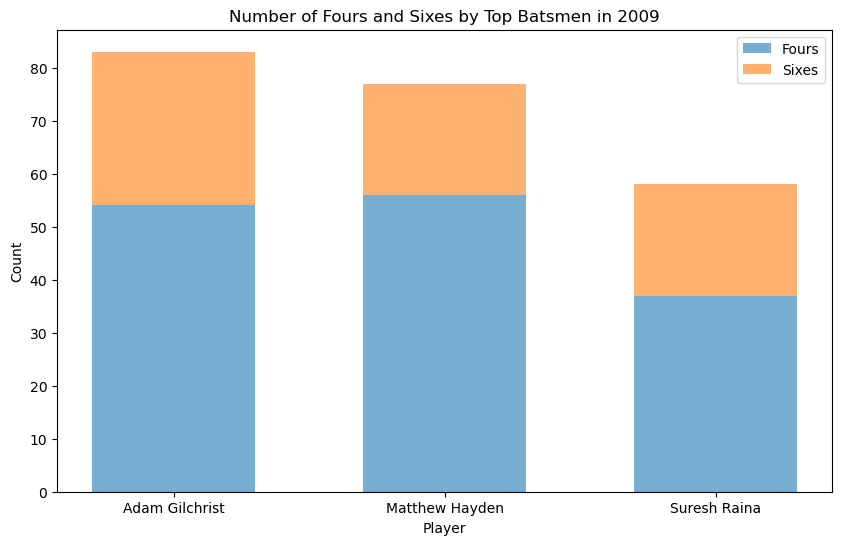

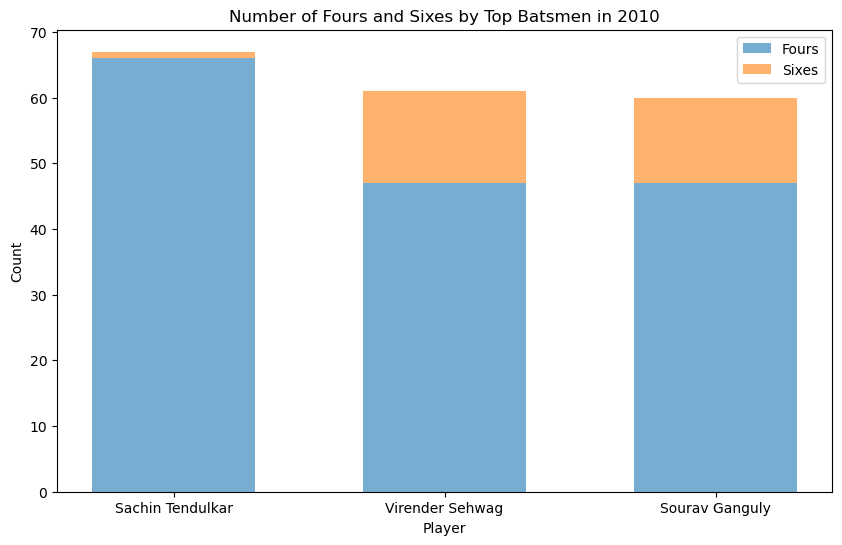

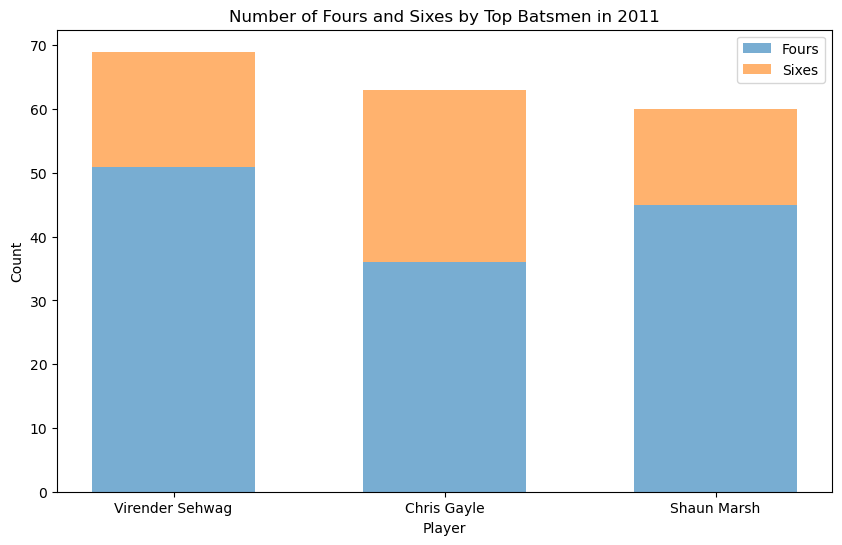

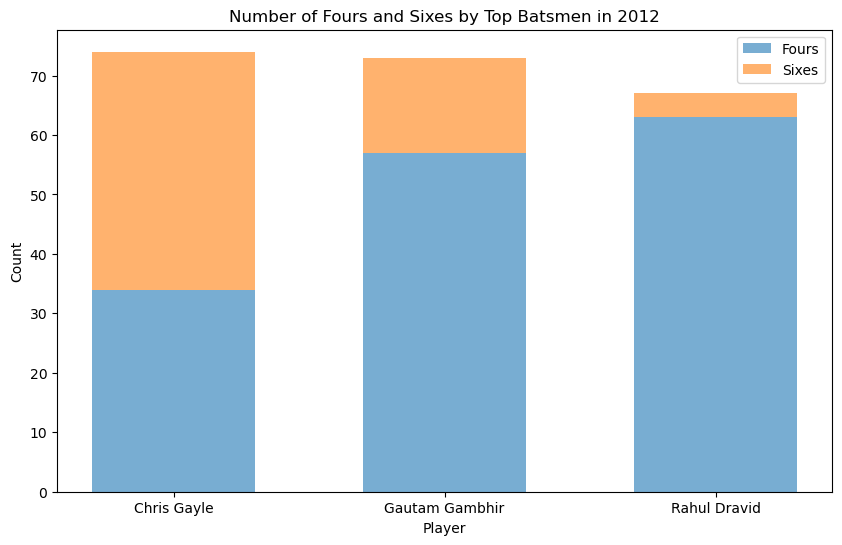

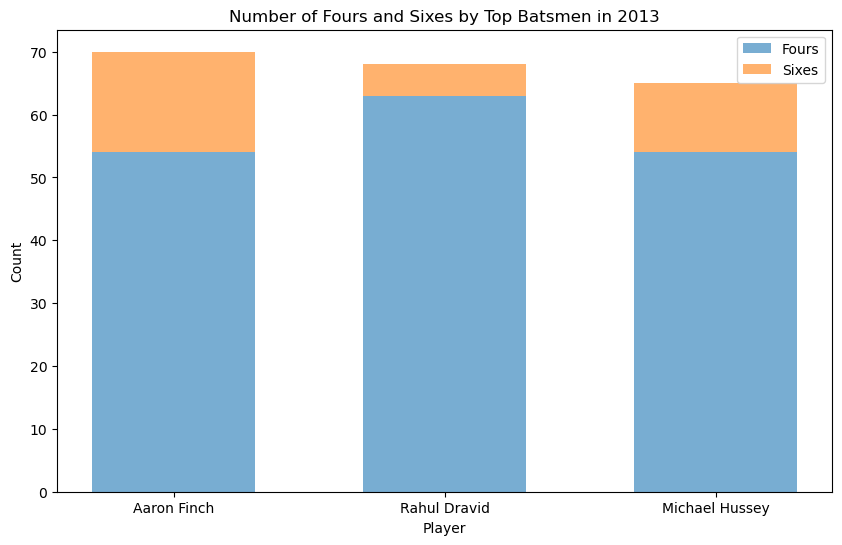

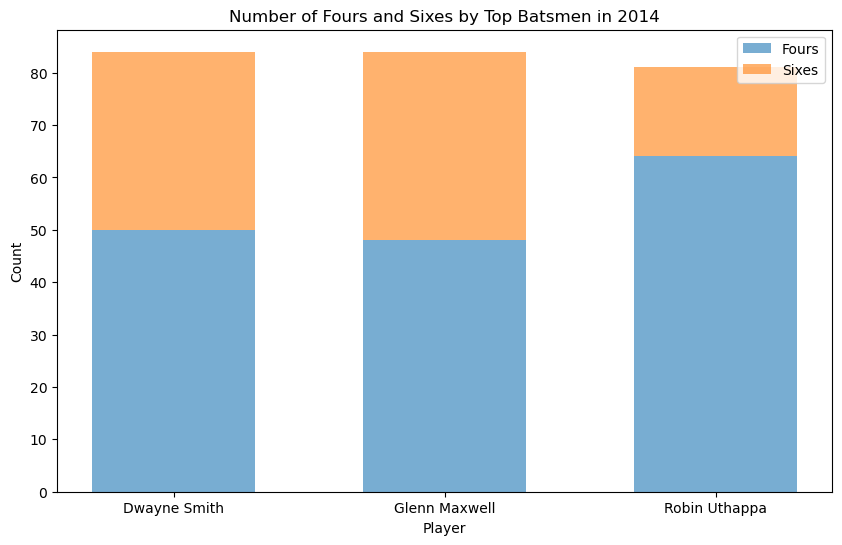

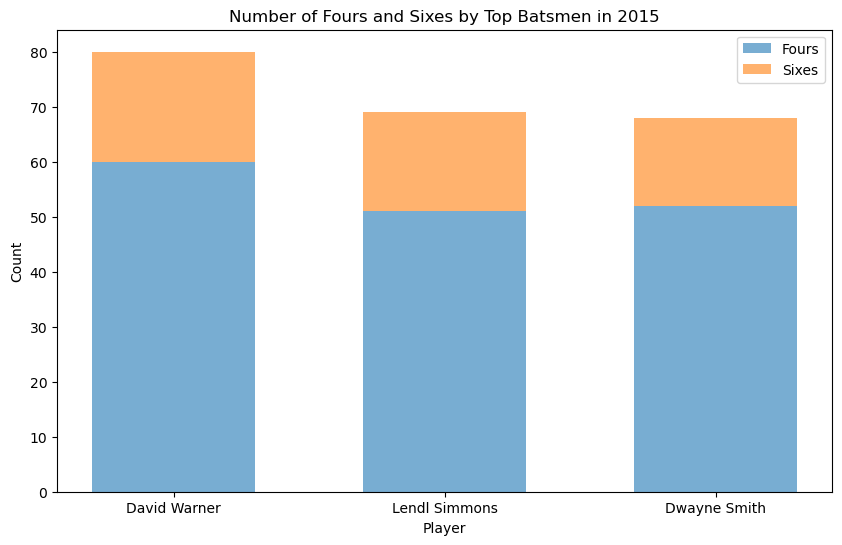

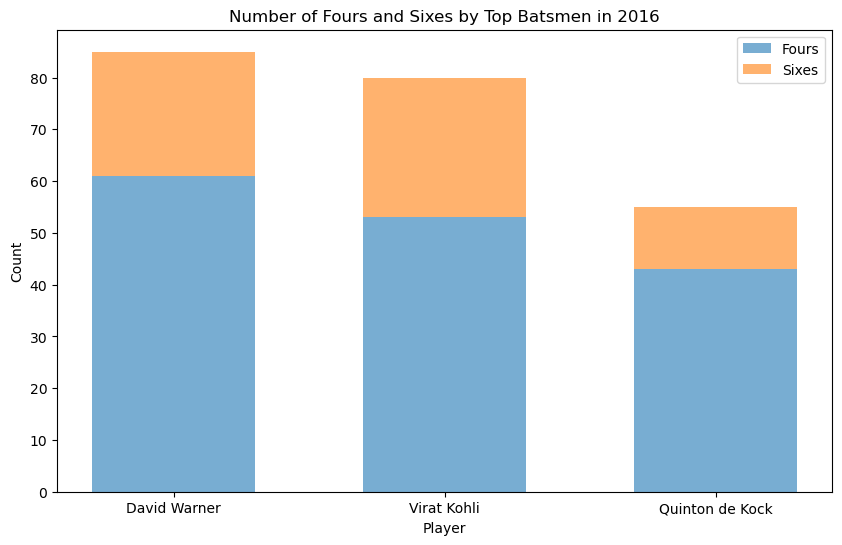

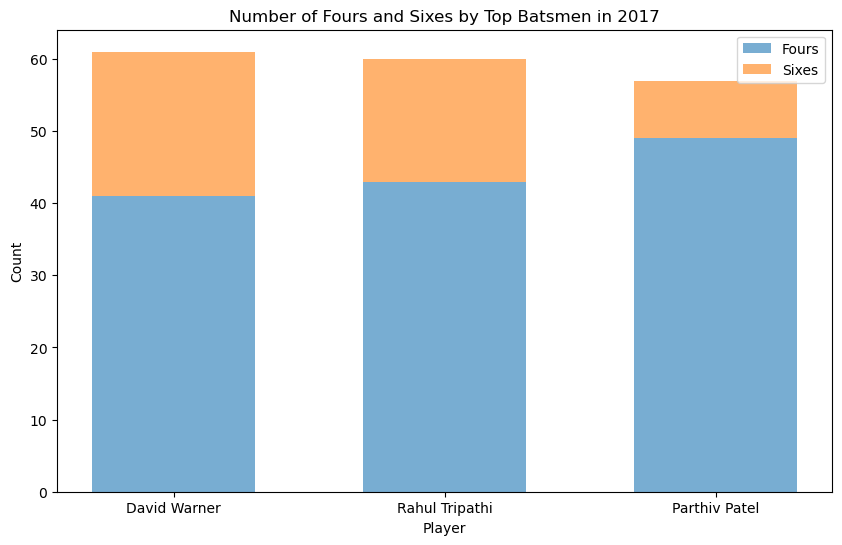

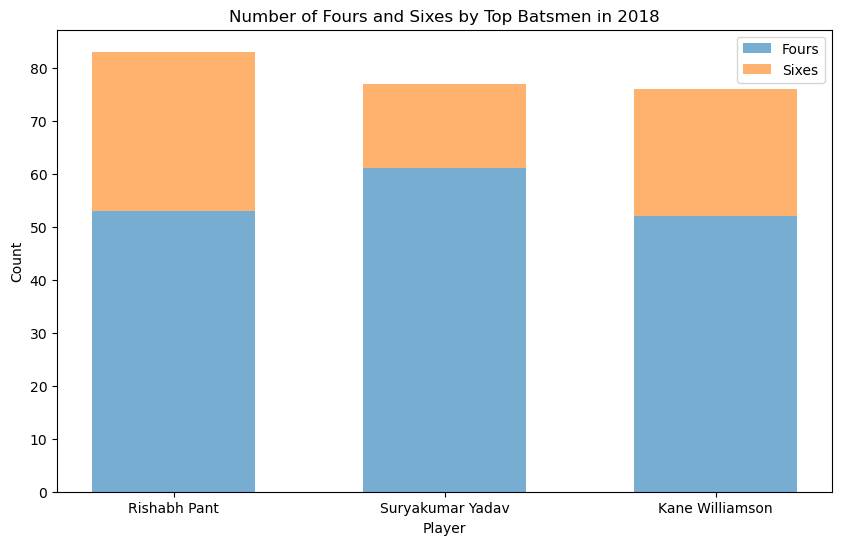

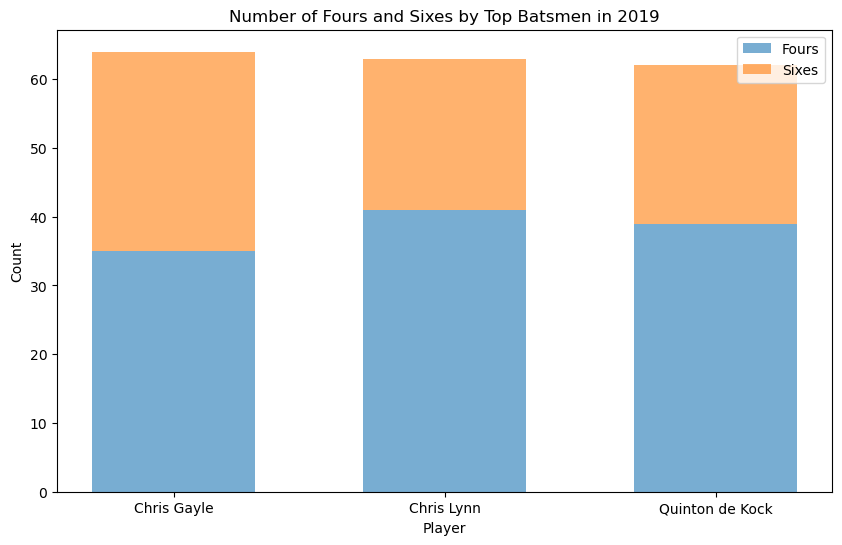

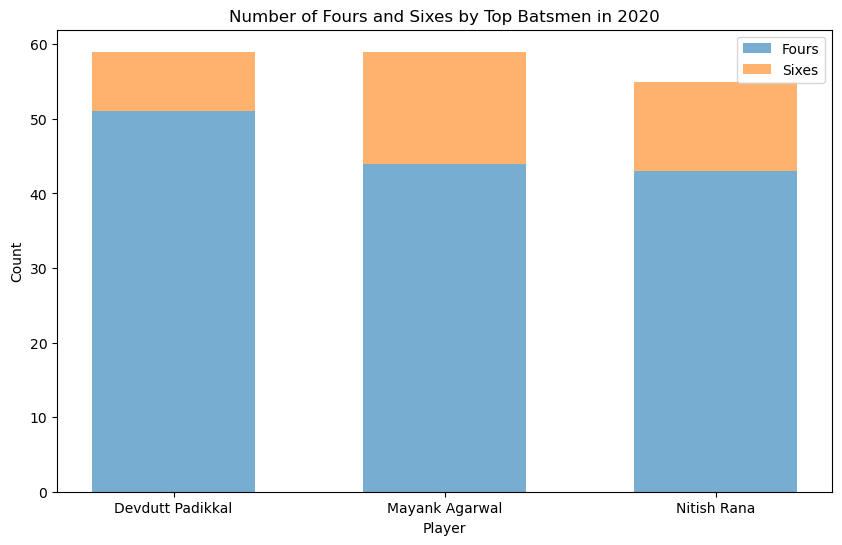

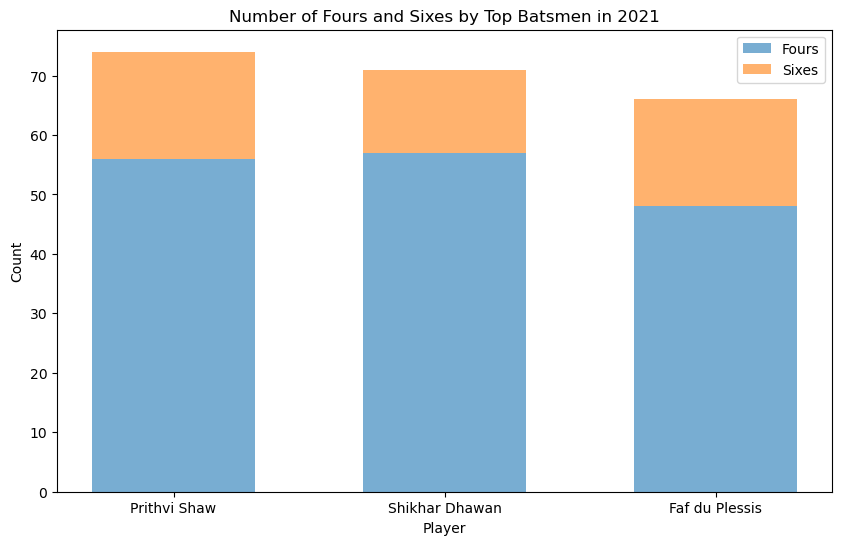

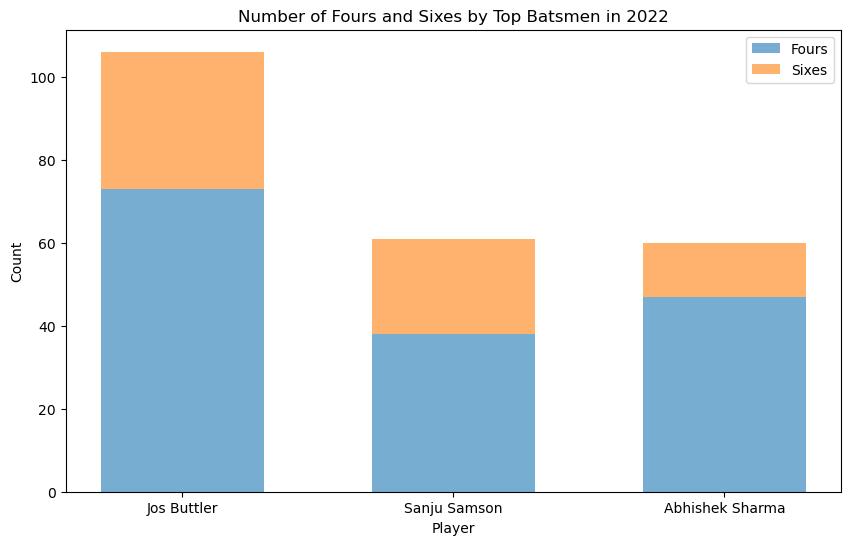

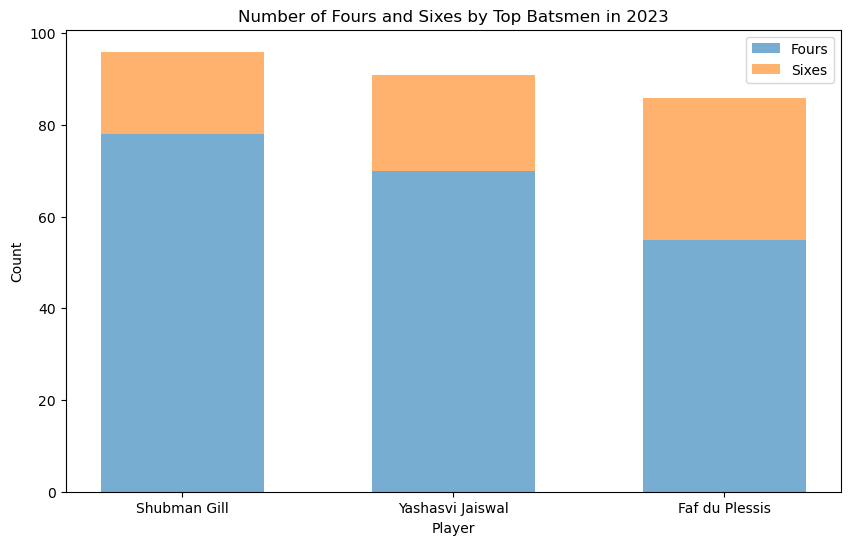

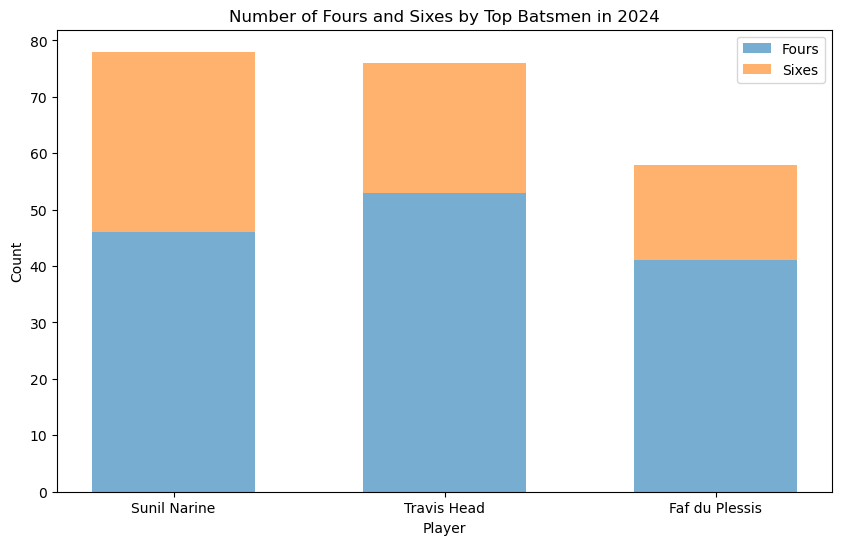

In [46]:
for season in seasons:
    season_data = top_batsmen[top_batsmen['season'] == season]
    plt.figure(figsize=(10, 6))
    
    # Plot number of fours
    plt.bar(season_data['fullName'], season_data['fours'], label='Fours', alpha=0.6,width=0.6)
    
    # Plot number of sixes on top of the fours
    plt.bar(season_data['fullName'], season_data['sixes'], bottom=season_data['fours'], label='Sixes', alpha=0.6,width=0.6)
    
    plt.title(f'Number of Fours and Sixes by Top Batsmen in {int(season)}')
    plt.xlabel('Player')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

## Consistency Metrices

In [47]:
df['50_plus'] = (df['runs'] >= 50) & (df['runs'] < 100)

In [48]:
df['100_plus'] = df['runs'] >= 100

In [49]:
scores = df.groupby(['season', 'fullName']).agg({'50_plus': 'sum', '100_plus': 'sum'}).reset_index()

In [50]:
seasons = scores['season'].unique()
players = scores['fullName'].unique()

plt.figure(figsize=(14, 7))


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

KeyError: 'fullName '

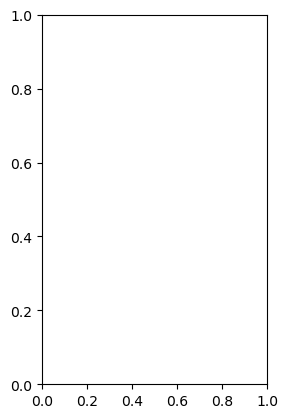

In [55]:
plt.subplot(1, 2, 1)
for player in players:
    player_data = scores[scores['fullName '] ==fullName ]
    plt.plot(player_data['season'], player_data['50_plus'], marker='o', label=player)

plt.title('Number of 50+ Scores by Batsmen Across Seasons')
plt.xlabel('Season')
plt.ylabel('50+ Scores')
plt.legend()
plt.grid(True)